–†–æ–º–∞–Ω–æ–≤—Å–∫–∏–π –ê. –ù. 30.11.2022

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics.cluster import v_measure_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

### 1. –ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ. 
* –î–æ–±–µ–π—Ç–µ—Å—å, —á—Ç–æ–±—ã –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `X` –æ–∫–∞–∑–∞–ª—Å—è –º–∞—Å—Å–∏–≤ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π 1797 $\times$ 64 —á–∏—Å–ª–∞, –∞ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `y` ‚Äì –º–∞—Å—Å–∏–≤ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π 1797 —á–∏—Å–µ–ª.

In [2]:
digits = load_digits()

In [3]:
digits['data'].shape

(1797, 64)

In [4]:
digits['target'].shape

(1797,)

In [5]:
x = digits['data']

In [6]:
y = digits['target']

#### –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –ø–µ—Ä–≤—ã–µ –¥–µ—Å—è—Ç—å –∫–∞—Ä—Ç–∏–Ω–æ–∫ 
* –†–∞—Å–ø–æ–ª–æ–∂–∏–≤ –∏—Ö –Ω–∞ —Å–µ—Ç–∫–µ 3 √ó 4 (–≤ –ø–æ—Å–ª–µ–¥–Ω–µ–º —Ä—è–¥—É –æ—Å—Ç–∞–Ω—É—Ç—Å—è –ø—É—Å—Ç—ã–µ –º–µ—Å—Ç–∞). –î–æ–±–µ–π—Ç–µ—Å—å, —á—Ç–æ–±—ã —Ñ–æ–Ω –∫–∞—Ä—Ç–∏–Ω–æ–∫ –±—ã–ª –±–µ–ª—ã–º, –∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ü–∏—Ñ—Ä ‚Äì —Ç—ë–º–Ω—ã–º–∏.

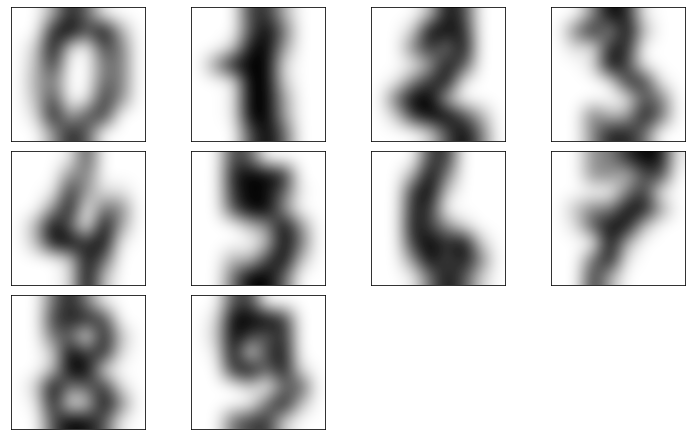

In [7]:
plt.figure(figsize=(10, 6), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    #plt.axis('off')
    plt.imshow(x[i].reshape([8,8]),  interpolation= 'bicubic', cmap=plt.cm.gray_r);  

### 2. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞

* –ò—Å–ø–æ–ª—å–∑—É—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –∏ ùêæ —Å—Ä–µ–¥–Ω–∏—Ö, –ø–æ–ª—É—á–∏—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ X –Ω–∞ 10 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.

In [8]:
kmeans = KMeans(n_clusters=10, n_init = 100)
y_kmeans = kmeans.fit_predict(x)
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
clustering = AgglomerativeClustering(n_clusters = 10)
y_clustering = clustering.fit_predict(x)
np.unique(y_clustering)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

* –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∫–∞–∂–¥—ã–º –∏–∑ –¥–≤—É—Ö —Å–ø–æ—Å–æ–±–æ–≤. –≠—Ç–æ –æ–ø—è—Ç—å –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–∞ —Å–µ—Ç–∫–µ 3 √ó 4 —Å –±–µ–ª—ã–º —Ñ–æ–Ω–æ–º –∏ —Ç—ë–º–Ω—ã–º–∏ –∫–æ–Ω—Ç—É—Ä–∞–º–∏. 

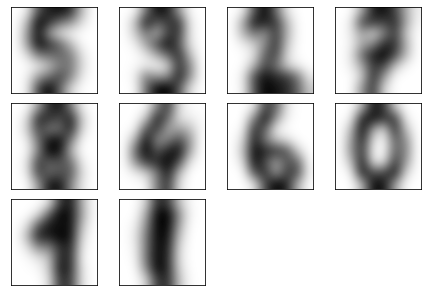

In [10]:
plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[y_clustering==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r);  

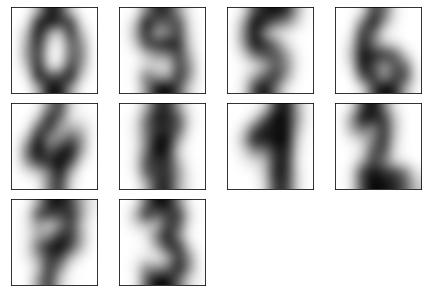

In [11]:
plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[y_kmeans==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

* –ü—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ: –∫–∞–∫–æ–π –∏–∑ –¥–≤—É—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –¥–∞—ë—Ç —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ —Ç–∏–ø–∏—á–Ω—ã–µ –Ω–∞—á–µ—Ä—Ç–∞–Ω–∏—è —Ü–∏—Ñ—Ä?
_____
–í–∏–∑—É–∞–ª—å–Ω–æ –æ–±–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –¥–∞—é—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –¶–∏—Ñ—Ä—ã —Ä–∞–∑–±–æ—Ä—á–∏–≤—ã –≤ –¥–≤—É—Ö —Å–∏—Ç—É–∞—Ü–∏—è—Ö

* –î–ª—è —á–∏—Å–ª–∞ ùêæ –æ—Ç 2 –¥–æ 20 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –ø–æ–ª—É—á–∏—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ X –Ω–∞ ùêæ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫–∞–∂–¥—ã–º –∏–∑ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∏–ª—É—ç—Ç. –ü–æ—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤ –≤–∏–¥–µ –≥—Ä–∞—Ñ–∏–∫–∞ –≤ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö: —á–∏—Å–ª–æ ùêæ ‚Äì –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–ª—É—ç—Ç–∞. –ü—Ä–∏ –∫–∞–∫–æ–º —á–∏—Å–ª–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º —Å–∏–ª—É—ç—Ç–∞?

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(x)

In [13]:
#X_scaled = x

In [14]:
km_silhouette = []
agg_clustering_silhouette = []

for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    silhouette = silhouette_score(X_scaled, preds)
    km_silhouette.append(silhouette)
    
    
    clustering = AgglomerativeClustering(n_clusters = i).fit(X_scaled)
    predict = clustering.fit_predict(X_scaled)
    agg_silhouette = silhouette_score(X_scaled, predict)
    agg_clustering_silhouette.append(agg_silhouette)
    
    print("Cluster number {}: Agglomerative_Silhouette score {}".format(i,agg_silhouette))
    print("Cluster number {}: Kmeans_Silhouette score {}".format(i,silhouette))
    print('_'*40)

Cluster number 2: Agglomerative_Silhouette score 0.11789115786376413
Cluster number 2: Kmeans_Silhouette score 0.11943210390295135
________________________________________
Cluster number 3: Agglomerative_Silhouette score 0.11003570155202355
Cluster number 3: Kmeans_Silhouette score 0.12537851310016052
________________________________________
Cluster number 4: Agglomerative_Silhouette score 0.1069144433864155
Cluster number 4: Kmeans_Silhouette score 0.12707355067903112
________________________________________
Cluster number 5: Agglomerative_Silhouette score 0.11664718917297694
Cluster number 5: Kmeans_Silhouette score 0.13678946629963
________________________________________
Cluster number 6: Agglomerative_Silhouette score 0.13374128330757012
Cluster number 6: Kmeans_Silhouette score 0.14973729076956593
________________________________________
Cluster number 7: Agglomerative_Silhouette score 0.1510158329569802
Cluster number 7: Kmeans_Silhouette score 0.16244393018841607
______________

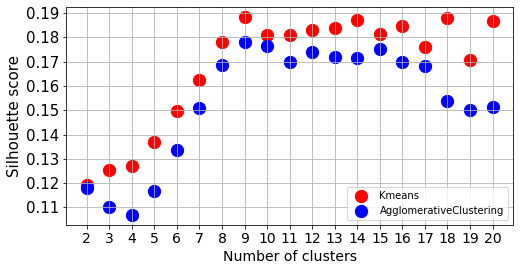

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150, color = 'r', label='Kmeans')
plt.scatter(x=[i for i in range(2,21)],y=agg_clustering_silhouette,s=150, color = 'b', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend(loc = 'lower right')
plt.yticks(fontsize=15)

plt.show()

_____
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Silhouette 0,188 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ Kmeans –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 9 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Silhouette 0.1782 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ AgglomerativeClustering –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 9 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
____

* –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–µ –∑–∞–¥–∞–Ω–∏–µ, –∏—Å–ø–æ–ª—å–∑—É—è ùëâ-–º–µ—Ä—É –≤–º–µ—Å—Ç–æ —Å–∏–ª—É—ç—Ç–∞. –ü—Ä–∏ –∫–∞–∫–æ–º —á–∏—Å–ª–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º ùëâ-–º–µ—Ä—ã?

In [16]:
#X_scaled = x

In [17]:
km_homogeneity = []
agg_clustering_homogeneity = []
print('_'*38, 'homogeneity    ',   '     completeness','      v_measure')
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    pred = km.predict(X_scaled)
    homogeneity = homogeneity_completeness_v_measure(y, pred)
    km_homogeneity.append(homogeneity)
    
    clustering = AgglomerativeClustering(n_clusters = i).fit(X_scaled)
    predict = clustering.fit_predict(X_scaled)
    agg_homogeneity = homogeneity_completeness_v_measure(y, predict)
    agg_clustering_homogeneity.append(agg_homogeneity)
    
    print("Cluster number {}: Agglomerative_model {}".format(i,agg_homogeneity))
    print("Cluster number {}: Kmeans_model        {}".format(i,homogeneity))
    print('_'*40)

______________________________________ homogeneity          completeness       v_measure
Cluster number 2: Agglomerative_model (0.25818781836327476, 0.9747507265121849, 0.4082421862342204)
Cluster number 2: Kmeans_model        (0.23184085045424743, 0.8580043142648923, 0.36504350590728013)
________________________________________
Cluster number 3: Agglomerative_model (0.41814615892149093, 0.8826547096029856, 0.5674637608339015)
Cluster number 3: Kmeans_model        (0.31331627060643513, 0.6612905566091402, 0.4251829254592324)
________________________________________
Cluster number 4: Agglomerative_model (0.5005887498078059, 0.9000488222630958, 0.6433560311201815)
Cluster number 4: Kmeans_model        (0.36892440289421147, 0.6143840562249372, 0.4610176369143668)
________________________________________
Cluster number 5: Agglomerative_model (0.5973282090866209, 0.8856810729585931, 0.7134713120644431)
Cluster number 5: Kmeans_model        (0.48542122449194464, 0.7173865714299446, 0.5790362

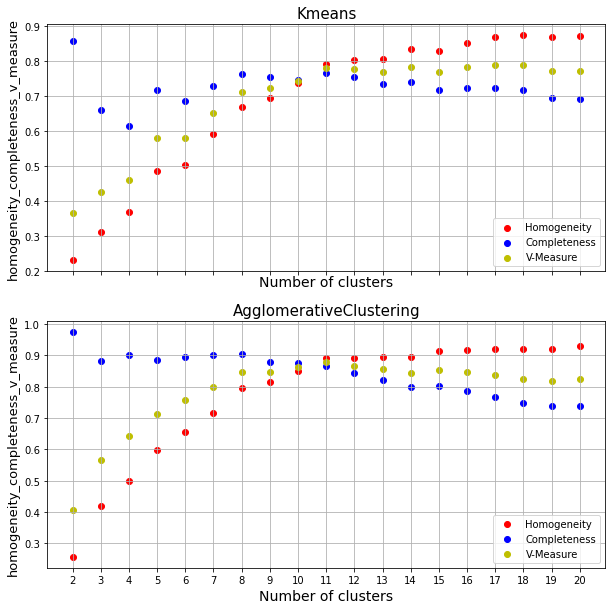

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axs[0].set_title('Kmeans', fontsize=15)
axs[0].scatter(x=[i for i in range(2,21)],y = [s[0] for s in km_homogeneity], color = 'r', label='Homogeneity')
axs[0].scatter(x=[i for i in range(2,21)],y = [s[1] for s in km_homogeneity], color ='b',  label='Completeness' )
axs[0].scatter(x=[i for i in range(2,21)],y = [s[2] for s in km_homogeneity], color = 'y', label='V-Measure' )


axs[1].set_title('AgglomerativeClustering', fontsize=15)
axs[1].scatter(x=[i for i in range(2,21)],y = [s[0] for s in agg_clustering_homogeneity], color = 'r', label='Homogeneity')
axs[1].scatter(x=[i for i in range(2,21)],y = [s[1] for s in agg_clustering_homogeneity], color ='b',  label='Completeness' )
axs[1].scatter(x=[i for i in range(2,21)],y = [s[2] for s in agg_clustering_homogeneity], color = 'y', label='V-Measure' )
for _ in range(2):
    axs[_].grid(True)
    axs[_].legend()
    axs[_].set_xlabel("Number of clusters",fontsize=14)
    axs[_].set_ylabel("homogeneity_completeness_v_measure",fontsize=13)
    axs[_].set_xticks([i for i in range(2,21)], fontsize=15)


plt.show()

_____   
    –ù–∞ —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ V-Measure 0.778 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ Kmeans –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 11 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ V-Measure 0.878 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ AgglomerativeClustering –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 11 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    
    –ù–∞ –Ω–µ—Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ V-Measure 0.783 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ Kmeans –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 11 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ V-Measure 0.8685 –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ AgglomerativeClustering –ø—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ 12 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
____

### 3. –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞

–í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã X, –æ—Å—Ç–∞–≤–ª—è—è 2, 5, 10, 20 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –í –∫–∞–∂–¥–æ–º —Å–ª—É—á–∞–µ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∏ ùêæ-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (—á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—Ä–∏–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º 10). –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ –∏ ùëâ-–º–µ—Ä—ã. –£–¥–∞–ª–æ—Å—å –ª–∏ –ø—Ä–∏ –∫–∞–∫–æ–º-–Ω–∏–±—É–¥—å ùëë‚Ä≤ –ø–æ–ª—É—á–∏—Ç—å —Å–∏–ª—É—ç—Ç –∏ / –∏–ª–∏ ùëâ-–º–µ—Ä—É –ª—É—á—à–µ, —á–µ–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö?

In [19]:
#x = X_scaled
n = [2, 5, 10, 20]
for i in n:
    svd = TruncatedSVD(n_components= i, random_state=42)
    vars()["svd_x"+f'{i}']=svd.fit_transform(X_scaled)

In [20]:
v_measure_svd = []
svd_x_silhouette = []
for i in svd_x2, svd_x5, svd_x10, svd_x20:
    
    km = KMeans(n_clusters=10, random_state=0).fit(i)
    preds = km.predict(i)
    silhouette = silhouette_score(i, preds)
    svd_x_silhouette.append(silhouette)
    
    v_measure = v_measure_score(y, preds)
    v_measure_svd.append(v_measure)
    print(f"Silhouette score {silhouette} ")
    print(f"V_measure score  {v_measure}  ")

Silhouette score 0.3586651399118857 
V_measure score  0.39180554935277734  
Silhouette score 0.3367885153767842 
V_measure score  0.6370441723052865  
Silhouette score 0.2776976525992142 
V_measure score  0.7265545345426508  
Silhouette score 0.21528104611269172 
V_measure score  0.7450873004644224  


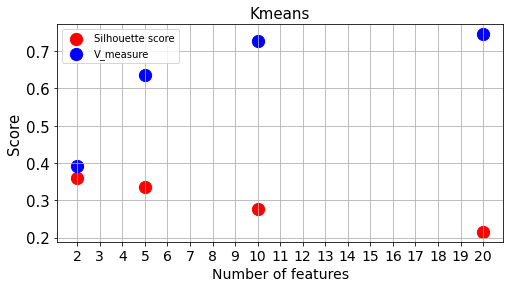

In [21]:
plt.figure(figsize=(8,4))
plt.title('Kmeans', fontsize=15)
plt.scatter(x=[2, 5, 10, 20],y=svd_x_silhouette,s=150, color = 'r', label='Silhouette score')
plt.scatter(x=[2, 5, 10, 20],y=v_measure_svd,s=150, color = 'b', label='V_measure')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("Score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend()
plt.yticks(fontsize=15)

plt.show()

In [22]:
v_measure_svd_agg = []
svd_x_silhouette_agg = []
for i in svd_x2, svd_x5, svd_x10, svd_x20:
    
    clustering = AgglomerativeClustering(n_clusters = 10).fit(i)
    predict = clustering.fit_predict(i)
    silhouette = silhouette_score(i, predict)
    svd_x_silhouette_agg.append(silhouette)
    
    v_measure = v_measure_score(y, predict)
    v_measure_svd_agg.append(v_measure)
    
    print(f"Silhouette score {silhouette} ")
    print(f"V_measure score  {v_measure}  ")

Silhouette score 0.2951536422404763 
V_measure score  0.39083005070025967  
Silhouette score 0.28076830840553024 
V_measure score  0.6307675972626081  
Silhouette score 0.2587529336513205 
V_measure score  0.8316180940394277  
Silhouette score 0.20824712971860693 
V_measure score  0.8577487931903306  


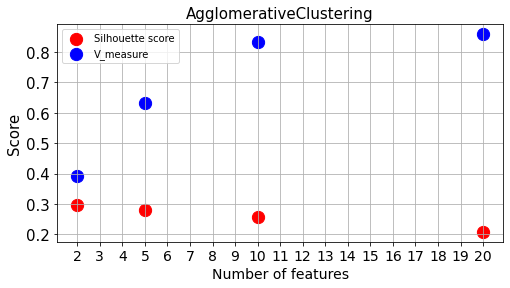

In [23]:
plt.figure(figsize=(8,4))
plt.title('AgglomerativeClustering', fontsize=15)
plt.scatter(x=[2, 5, 10, 20],y=svd_x_silhouette_agg,s=150, color = 'r', label='Silhouette score')
plt.scatter(x=[2, 5, 10, 20],y=v_measure_svd_agg,s=150, color = 'b', label='V_measure')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("Score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend()
plt.yticks(fontsize=15)

plt.show()

____
    –°–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ –ø–æ–≤–ª—è–ª–æ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
    –õ—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏:
    v_measure –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–∞–º–∞ Kmeans 0.745, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 20
    silhouette –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–∞–º–∞ Kmeans 0.391, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 2
    
    v_measure –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–∞–º–∞ AgglomerativeClustering 0.8577,–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 20
    silhouette –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–∞–º–∞ AgglomerativeClustering 0.3908,–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 2
    
    –í—Å–µ –º–µ—Ç—Ä–∏–∫–∏ —Ö—É–∂–µ, —á–µ–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
_____

* –í—ã–ø–æ–ª–Ω–∏—Ç–µ tSNE-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã X, –æ—Å—Ç–∞–≤–∏–≤ 2 –ø—Ä–∏–∑–Ω–∞–∫–∞. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤ –≤–∏–¥–µ —Ç–æ—á–µ—á–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã: –ø–µ—Ä–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤–¥–æ–ª—å –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –æ—Å–∏, –≤—Ç–æ—Ä–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –≤–¥–æ–ª—å –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–π –æ—Å–∏. –ü–æ–¥—Å–≤–µ—Ç–∏—Ç–µ —Ä–∞–∑–Ω—ã–º–∏ —Ü–≤–µ—Ç–∞–º–∏ –≥—Ä—É–ø–ø—ã —Ç–æ—á–µ–∫, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ä–∞–∑–Ω—ã–º —Ü–∏—Ñ—Ä–∞–º.

In [24]:
x = X_scaled

In [25]:
x_tsne = TSNE(n_components=2).fit_transform(X_scaled)

In [26]:
x_tsne.shape

(1797, 2)

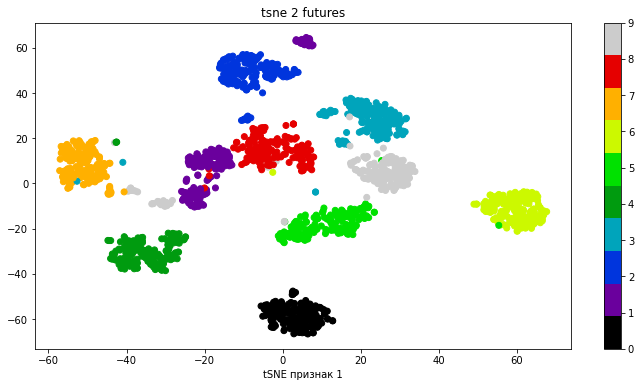

In [27]:
fig, axs =plt.subplots(figsize=(12,6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()


plt.xlabel("tSNE –ø—Ä–∏–∑–Ω–∞–∫ 0")
plt.xlabel("tSNE –ø—Ä–∏–∑–Ω–∞–∫ 1")
plt.title('tsne 2 futures');

* –î–ª—è tSNE-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å 2 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∏ ùêæ-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é (—á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—Ä–∏–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º 10). –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ –∏ ùëâ-–º–µ—Ä—ã. –£–¥–∞–ª–æ—Å—å –ª–∏ –ø–æ–ª—É—á–∏—Ç—å —Å–∏–ª—É—ç—Ç –∏ / –∏–ª–∏ ùëâ-–º–µ—Ä—É –ª—É—á—à–µ, —á–µ–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö?

In [28]:
km = KMeans(n_clusters=10, random_state=0).fit(x_tsne)
preds = km.predict(x_tsne)
silhouette = silhouette_score(x_tsne, preds)
v_measure = v_measure_score(y, preds)
print("Silhouette score {}".format(silhouette))
print("v_measure score {}".format(v_measure))

Silhouette score 0.6487438678741455
v_measure score 0.9129932687323957


In [29]:
clustering = AgglomerativeClustering(n_clusters = 10).fit(x_tsne)
predict = clustering.fit_predict(x_tsne)
silhouette = silhouette_score(x_tsne, predict)
v_measure = v_measure_score(y, predict)
print("Silhouette score : {}".format(silhouette))
print("v_measure score : {}".format(v_measure))

Silhouette score : 0.6470820307731628
v_measure score : 0.9116073483751751


 ____   
    –ê–ª–≥–æ—Ä–∏—Ç–º KMeans —Å tSNE –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
    –ù–∞ –Ω–µ—Å–∫–∞–ª—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
    v_measure 0.9067
    silhouette 0.638
    –ù–∞ —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
    v_measure 0.879
    silhouette 0.647
 _____

* –î–ª—è —Å–∞–º–æ–≥–æ –ª—É—á—à–µ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä–æ–µ –≤–∞–º —É–¥–∞–ª–æ—Å—å –ø–æ–ª—É—á–∏—Ç—å (–Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ, –ª—É—á—à–µ–≥–æ –≤ —Ç–µ—Ä–º–∏–Ω–∞—Ö —Å–∏–ª—É—ç—Ç–∞ –∏–ª–∏ ùëâ-–º–µ—Ä—ã), –æ–ø—è—Ç—å –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –£–¥–∞–ª–æ—Å—å –ª–∏ –¥–æ–±–∏—Ç—å—Å—è, —á—Ç–æ–±—ã –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Ç–µ—Ä —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞–ª –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –æ–¥–Ω–æ–π —Ü–∏—Ñ—Ä–µ?

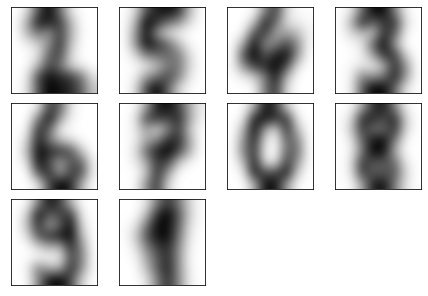

In [30]:
km = KMeans(n_clusters=10, random_state=0).fit(x_tsne)
preds = km.predict(x_tsne)

plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[preds==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

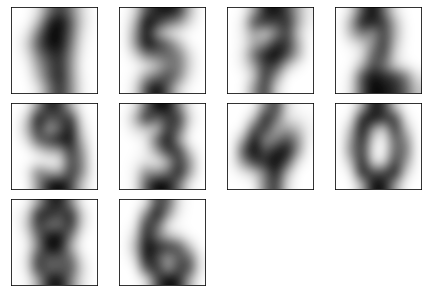

In [31]:
clustering = AgglomerativeClustering(n_clusters = 10).fit(x_tsne)
predict = clustering.fit_predict(x_tsne)

plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[predict==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

### 4. –ò—Ç–æ–≥–∏

–ù–∞–ø–∏—à–∏—Ç–µ –≤ —Å–≤–æ–±–æ–¥–Ω–æ–π —Ñ–æ—Ä–º–µ, –∫–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –≤—ã —Å–¥–µ–ª–∞–ª–∏ –∏–∑ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã. –û—Ç–≤–µ—Ç—å—Ç–µ, –∫–∞–∫ –º–∏–Ω–∏–º—É–º, –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –¥–≤–∞ –≤–æ–ø—Ä–æ—Å–∞:

    –ö–∞–∫–æ–π –∏–∑ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤ –¥–∞—ë—Ç –±–æ–ª–µ–µ –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã ‚Äì –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏–ª–∏ –∞–ª–≥–æ—Ä–∏—Ç–º ùêæ —Å—Ä–µ–¥–Ω–∏—Ö? 
    –ó–∞–≤–∏—Å–∏—Ç –ª–∏ —ç—Ç–æ –æ—Ç –Ω–∞—Å—Ç—Ä–æ–µ–∫ –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞? –û—Ç –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞?
    –£–¥–∞—ë—Ç—Å—è –ª–∏ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, —Å–Ω–∏–∂–∞—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞?

* –í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ, —Å–ª–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –ø—Ä–∏–∏–º—É—â–µ—Å—Ç–≤–∞ —Ç–æ–≥–æ –∏–ª–∏ –∏–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞ –∫–ª–∞—Å—Ç–µ—Ä–µ–∑–∞—Ü–∏–∏, –æ–±–∞ –º–µ—Ç–æ–¥–∞ –ø–æ–∫–∞–∑–∞–ª–∏ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ  —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
* –Ø–≤–Ω–æ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —á—Ç–æ, –ø—Ä–∏ tSNE –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏ –≤—Å–µ –º–µ—Ç—Ä–∏ –≤–æ–∑—Ä–∞—Ç—Å–∞—é—Ç. 


In [44]:
from scipy.stats import mode

labels = np.zeros_like(preds )
for i in range(10):
    mask = (preds  == i)
    labels[mask] = mode(y[mask])[0]

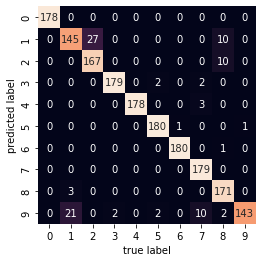

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
corr = confusion_matrix(y, labels)
sns.heatmap(corr, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');